In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
file_path_train = "/kaggle/input/titanic/train.csv"
train = pd.read_csv(file_path_train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
file_path_test = "/kaggle/input/titanic/test.csv"
test = pd.read_csv(file_path_test)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# 3.3 Family size
for df in [train, test]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

In [6]:
# print(train[train['Embarked'].isna()])
train.loc[train['PassengerId'].isin([62, 830]), 'Embarked'] = 'C'
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
IsAlone          0
dtype: int64

In [7]:
mapping = {'S':0, 'C':1, 'Q':2}
for df in [train, test]:
    df['Sex'] = df['Sex'].map({'male':0, 'female':1})
    df['Embarked'] = df['Embarked'].map(mapping)

In [8]:
missing_fare_index = test[test['Fare'].isna()].index
# print(test.loc[missing_fare_index])
for idx in missing_fare_index:
    pclass = test.loc[idx, 'Pclass']
    median_fare = test[test['Pclass'] == pclass]['Fare'].median()
    test.loc[idx, 'Fare'] = median_fare

In [9]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
IsAlone          0
dtype: int64

In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
IsAlone          0
dtype: int64

In [11]:
# age_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']

# train_known_age = train[train['Age'].notna()]
# train_missing_age = train[train['Age'].isna()]

# from sklearn.ensemble import RandomForestRegressor

# age_model = RandomForestRegressor(n_estimators=100, random_state=42)
# age_model.fit(train_known_age[age_features], train_known_age['Age'])

# train.loc[train['Age'].isna(), 'Age'] = age_model.predict(train_missing_age[age_features])
# test_missing_age = test[test['Age'].isna()]
# test.loc[test['Age'].isna(), 'Age'] = age_model.predict(test_missing_age[age_features])



In [12]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import HistGradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from scipy.stats import randint, uniform

# # ✅ 1. Features to use for age prediction
# age_features = ['Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']

# # ✅ 2. Separate rows with known and missing Age
# train_known_age = train[train['Age'].notna()]
# test_known_age = test[test['Age'].notna()]
# train_missing_age = train[train['Age'].isna()]
# test_missing_age = test[test['Age'].isna()]

# # ✅ 3. Identify categorical & numerical columns
# cat_cols = ['Sex', 'Embarked', 'IsAlone']
# num_cols = ['Pclass', 'Fare', 'FamilySize']

# # ✅ 4. Preprocessing pipelines
# num_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=2, include_bias=False))  # adds interaction & squared terms
# ])

# cat_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer([
#     ('num', num_transformer, num_cols),
#     ('cat', cat_transformer, cat_cols)
# ])

# # ✅ 5. Regressor model — HistGradientBoosting often performs better than RF
# model = HistGradientBoostingRegressor(random_state=42)

# # ✅ 6. Build pipeline
# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', model)
# ])

# # ✅ 7. Hyperparameter tuning with RandomizedSearchCV
# param_dist = {
#     'regressor__max_depth': randint(3, 10),
#     'regressor__learning_rate': uniform(0.01, 0.2),
#     'regressor__max_iter': randint(100, 400),
#     'regressor__l2_regularization': uniform(0.0, 0.5)
# }

# search = RandomizedSearchCV(
#     pipe,
#     param_distributions=param_dist,
#     n_iter=30,
#     cv=3,
#     n_jobs=-1,
#     scoring='neg_mean_absolute_error',
#     random_state=42,
#     verbose=1
# )

# # ✅ 8. Train on rows with known Age
# search.fit(train_known_age[age_features], train_known_age['Age'])
# search.fit(test_known_age[age_features], test_known_age['Age'])
# best_model = search.best_estimator_
# print("Best Params for Age Model:", search.best_params_)

# # ✅ 9. Predict missing Age for TRAIN
# if not train_missing_age.empty:
#     train.loc[train['Age'].isna(), 'Age'] = best_model.predict(train_missing_age[age_features])

# # ✅ 10. Predict missing Age for TEST
# test_missing_age = test[test['Age'].isna()]
# if not test_missing_age.empty:
    # test.loc[test['Age'].isna(), 'Age'] = best_model.predict(test_missing_age[age_features])



In [13]:
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# ✅ 1. Features to use for age prediction (already encoded/scaled)
age_features = ['Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']

# ✅ 2. Separate rows with known and missing Age
train_known_age = train[train['Age'].notna()]
train_missing_age = train[train['Age'].isna()]
test_missing_age = test[test['Age'].isna()]

# ✅ 3. Define model
model = HistGradientBoostingRegressor(random_state=42)

# ✅ 4. Hyperparameter search space
param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'max_iter': randint(100, 400),
    'l2_regularization': uniform(0.0, 0.5)
}

# ✅ 5. RandomizedSearchCV
search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1
)

# ✅ 6. Train on known Age values
search.fit(train_known_age[age_features], train_known_age['Age'])

best_model = search.best_estimator_
print("Best Params for Age Model:", search.best_params_)
print("Best CV Score (MAE):", -search.best_score_)

# ✅ 7. Predict missing Age for TRAIN
if not train_missing_age.empty:
    train.loc[train['Age'].isna(), 'Age'] = best_model.predict(train_missing_age[age_features])

# ✅ 8. Predict missing Age for TEST
if not test_missing_age.empty:
    test.loc[test['Age'].isna(), 'Age'] = best_model.predict(test_missing_age[age_features])

print("✅ All missing Age values have been filled using the optimized model.")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Params for Age Model: {'l2_regularization': 0.003533152609858703, 'learning_rate': 0.014612485008283152, 'max_depth': 5, 'max_iter': 158}
Best CV Score (MAE): 10.399180196596179
✅ All missing Age values have been filled using the optimized model.


Missing Ages in Train after imputation: 0
Missing Ages in Test after imputation: 0


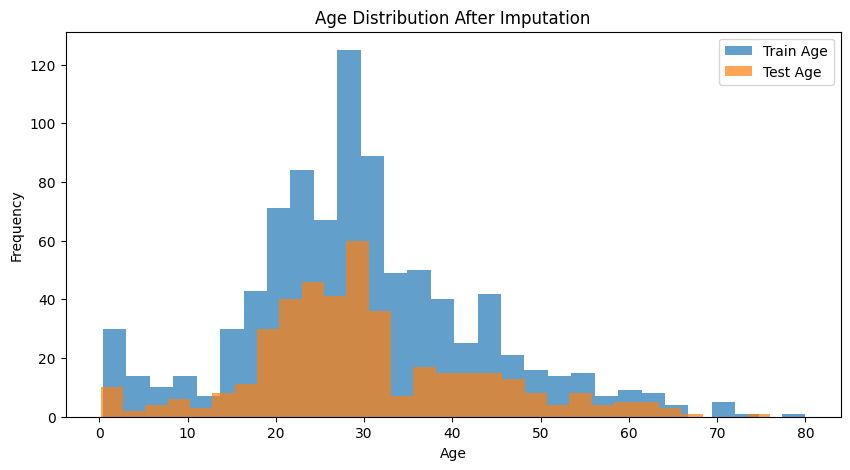

In [14]:
# Check if any missing Age values remain
print("Missing Ages in Train after imputation:", train['Age'].isna().sum())
print("Missing Ages in Test after imputation:", test['Age'].isna().sum())

# Optional: check distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(train['Age'], bins=30, alpha=0.7, label='Train Age')
plt.hist(test['Age'], bins=30, alpha=0.7, label='Test Age')
plt.title('Age Distribution After Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [15]:
# Extract title
for df in [train, test]:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map rare titles
title_mapping = {
    'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3,
    'Don':4, 'Rev':4, 'Dr':4, 'Mme':2, 'Ms':1, 'Major':4,
    'Lady':4, 'Sir':4, 'Mlle':1, 'Col':4, 'Capt':4, 'Countess':4, 'Jonkheer':4, 'Dona':4
}

for df in [train, test]:
    df['Title'] = df['Title'].map(title_mapping)

for df in [test,train]:
    print(df.isna().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
IsAlone          0
Title            0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
IsAlone          0
Title            0
dtype: int64


In [16]:
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin','FamilySize','SibSp']

X = train.drop(columns=drop_cols + ['Survived'])
y = train['Survived']
X_test = test.drop(columns=drop_cols)

In [17]:
corr_with_target = train.drop(columns=drop_cols).corr()['Survived'].sort_values(ascending=False)
print(corr_with_target)

Survived    1.000000
Sex         0.543351
Title       0.407753
Fare        0.257307
Embarked    0.111203
Parch       0.081629
Age        -0.068752
IsAlone    -0.203367
Pclass     -0.338481
Name: Survived, dtype: float64


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   IsAlone   891 non-null    int64  
 7   Title     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [19]:
from sklearn.metrics import accuracy_score 
from xgboost import XGBClassifier 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# replace this block with real data loa

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
input_dim = X_train.shape[1]

def build_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

model = build_model(input_dim)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3)
]

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, callbacks=callbacks, verbose=1)

val_probs = model.predict(X_val)
y_val_pred = (val_probs > 0.5).astype(int)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy={val_acc:.4f}")

test_probs = model.predict(X_test)
test_pred = (test_probs > 0.5).astype(int)
print(test_pred.shape)

np.savetxt("test_predictions.csv", test_pred, delimiter=",", fmt="%d")


2025-12-03 12:46:35.565893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764765995.867829      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764765995.951769      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-03 12:46:52.374475: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6424 - loss: 0.7735 - val_accuracy: 0.7821 - val_loss: 0.6039 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8002 - loss: 0.4727 - val_accuracy: 0.7765 - val_loss: 0.5943 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7893 - loss: 0.4962 - val_accuracy: 0.7933 - val_loss: 0.5726 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7829 - loss: 0.4940 - val_accuracy: 0.7877 - val_loss: 0.5519 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8272 - loss: 0.4244 - val_accuracy: 0.7821 - val_loss: 0.5384 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8265 - loss: 0.4444 - val_accuracy: 0.7765 - val_loss: 0.5232 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8118 - loss: 0.4573 - val_acc

In [21]:
# xgb_model = XGBClassifier(
#     n_estimators=1000,
#     max_depth=3,
#     learning_rate=0.01,
#     subsample=0.9,
#     colsample_bytree=0.8,
#     gamma=0.1,
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='logloss'
# )

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold # Good practice for cross-validation

# It's assumed X_train, y_train, X_val, y_val are already defined
# and properly preprocessed (imputed, encoded, etc.)

# 1. Define the individual models with strong starting parameters
clf1 = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.9,
    gamma=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Try loosening the default restrictions
clf2 = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42,
    num_leaves=40,          # Increase from the default of 31
    min_child_samples=10,   # Decrease from the default of 20
    max_depth=5,             # Increase from the default of -1 (no limit)
    verbosity= 1
)

clf3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_leaf=3,
    random_state=42
)

# 2. Create the Voting Classifier
# Using 'soft' voting often yields better results as it averages probabilities
ensemble_model = VotingClassifier(
    estimators=[('xgb', clf1), ('lgbm', clf2), ('rf', clf3)],
    voting='soft',
    weights=[0.35, 0.35, 0.30] # You can tune these weights
)

# 3. Train the ensemble model
# Note: For XGBoost and LGBM within a pipeline/ensemble, it's better to use early stopping with cross-validation
# For simplicity here, we'll fit it directly.
ensemble_model.fit(X_train, y_train)

# 4. Make predictions and evaluate
y_pred_ensemble = ensemble_model.predict(X_val)
acc_ensemble = accuracy_score(y_val, y_pred_ensemble)
test_predictions = ensemble_model.predict(X_test)
print(f"Ensemble Model Validation Accuracy={acc_ensemble:.4f}")

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 227
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [22]:
# =========================
# Create submission DataFrame
# =========================
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('titanic_submission.csv', index=False)
print("Submission file created: titanic_submission.csv")

Submission file created: titanic_submission.csv
